# An example of using BluePyOpt/NeuronUnit Optimization
Using:
* Allen Brain Experimental data (`specimen_id=325479788`, sweep number `64`) to derive features from.
* EFEL feature extraction
* BluePyOpt Optimization.
* Numba JIT simple cell models (Izhikevich, Adaptive Exponential).
* Neuronunit model scoring

In [1]:
import sys
sys.path.insert(0,'/home/user/git/revitalize/neuronunit')
del sys.path[-5]
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="paper", font="monospace")
%matplotlib inline
SILENT = True
import warnings
if SILENT:
    warnings.filterwarnings("ignore")

from neuronunit.plotting.plot_utils import check_bin_vm_soma
from neuronunit.allenapi.allen_data_driven import opt_setup
from nb_utils import optimize_job
from sciunit.scores import RelativeDifferenceScore
import pandas as pd
import pickle
import quantities as pq
specimen_id = 325479788
import numpy as np
from neuronunit.tests.target_spike_current import SpikeCountSearch
from neuronunit.optimization.optimization_management import inject_model_soma



In [2]:
def test_opt_relative_diff(specimen_id,model_type = "ADEXP",efel_filter_iterable=None):
    fitnesses,scores,obs_preds,opt,target,hall_of_fame,cell_evaluator = optimize_job(specimen_id,
                                                 model_type,
                                                 score_type=RelativeDifferenceScore,
                                                 efel_filter_iterable=efel_filter_iterable)
    print(fitnesses)
    return obs_preds,opt,target,hall_of_fame,cell_evaluator


# Below is a plot of vm trace for fitting the simple model to with neuron unit.
* It is from Allen Specimen id `325479788`, sweep number `64`.
* sweep number 


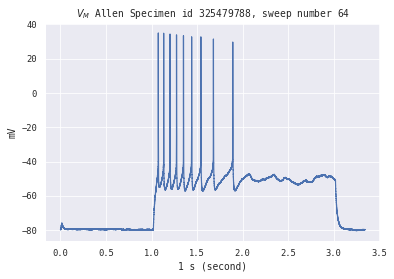

In [3]:
with open('325479788later_allen_NU_tests.p', "rb") as f:
    suite = pickle.load(f)
    
plt.plot(suite.traces["vm_soma"].times,suite.traces["vm_soma"])
plt.xlabel(pq.s)
plt.ylabel(suite.traces["vm_soma"].dimensionality)
plt.title("$V_{M}$ Allen Specimen id 325479788, sweep number 64")
plt.show()


# Example 1
* Izhikevich model 
* Allen specimen 325479788

In [ ]:
import quantities as qt
efel_filter_iterable = {
    "ISI_log_slope":None,
    "adaptation_index2":None,
    "first_isi":None,
    "ISI_CV":None,
    "median_isi":None,
    "Spikecount":None,
    "all_ISI_values":None,
    "ISI_values":None,
    "time_to_first_spike":None,
    "time_to_last_spike":None,
    "time_to_second_spike":None}
#}
efel_filter_iterable = list(efel_filter_iterable.keys())
#    "extra_tests":{"var_expl":suite.traces["vm_soma"],"vmr":qt.mV}
obs_preds,opt,target,hall_of_fame,cell_evaluator = test_opt_relative_diff(specimen_id = 325479788,
                                                                          model_type="IZHI",
                                                                          efel_filter_iterable=efel_filter_iterable)


<class 'jithub.models.model_classes.IzhiModel'>


  command:

    streamlit run /home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py [ARGUMENTS]
2021-02-15 17:45:08.299 WARNING root: 
  command:

    streamlit run /home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py [ARGUMENTS]
INFO:__main__:gen	nevals	avg    	std    	min    	max  
1  	100   	5391.89	7563.54	153.034	18000
2021-02-15 17:46:56.902 INFO    __main__: gen	nevals	avg    	std    	min    	max  
1  	100   	5391.89	7563.54	153.034	18000


INFO:__main__:2  	100   	5180.17	7446.7 	141.184	18000
2021-02-15 17:48:40.335 INFO    __main__: 2  	100   	5180.17	7446.7 	141.184	18000
INFO:__main__:3  	50    	1492.21	4214.83	110.193	18000
2021-02-15 17:49:19.076 INFO    __main__: 3  	50    	1492.21	4214.83	110.193	18000
INFO:__main__:4  	50    	1624.99	4808.92	108.63 	18000
2021-02-15 17:49:58.665 INFO    __main__: 4  	50    	1624.99	4808.92	108.63 	18000
INFO:__main__:5  	50    	1426.04	4527.41	60.0746	18000
2021-02-15 17:50:37.726 INFO    __main__: 5  	50    	1426.04	4527.41	60.0746	18000
INFO:__main__:6  	50    	1377.76	4536.27	47.1518	18000
2021-02-15 17:51:18.032 INFO    __main__: 6  	50    	1377.76	4536.27	47.1518	18000
INFO:__main__:7  	50    	2259.42	5639.89	45.8588	18000
2021-02-15 17:52:06.415 INFO    __main__: 7  	50    	2259.42	5639.89	45.8588	18000
INFO:__main__:8  	50    	2388.88	5898.68	45.1384	18000
2021-02-15 17:52:57.611 INFO    __main__: 8  	50    	2388.88	5898.68	45.1384	18000
INFO:__main__:9  	50    	1994.79	5

2021-02-15 18:20:32.594 INFO    __main__: 60 	50    	1000.38	3558.61	26.142 	14041.2
INFO:__main__:61 	50    	1694.77	4533.47	26.142 	14041.4
2021-02-15 18:21:01.145 INFO    __main__: 61 	50    	1694.77	4533.47	26.142 	14041.4
INFO:__main__:62 	50    	901.465	3486.46	26.142 	18000  
2021-02-15 18:21:36.898 INFO    __main__: 62 	50    	901.465	3486.46	26.142 	18000  
INFO:__main__:63 	50    	1593.31	4493.23	26.142 	18000  
2021-02-15 18:22:14.666 INFO    __main__: 63 	50    	1593.31	4493.23	26.142 	18000  
INFO:__main__:64 	50    	303.971	1952.46	26.142 	14041.5
2021-02-15 18:22:36.532 INFO    __main__: 64 	50    	303.971	1952.46	26.142 	14041.5
INFO:__main__:65 	50    	1354.09	4271.59	26.142 	18000  
2021-02-15 18:23:10.308 INFO    __main__: 65 	50    	1354.09	4271.59	26.142 	18000  
INFO:__main__:66 	50    	303.812	1952.41	26.142 	14040.9
2021-02-15 18:23:34.863 INFO    __main__: 66 	50    	303.812	1952.41	26.142 	14040.9
INFO:__main__:67 	50    	442.417	2379   	26.142 	14040  
2021-0

In [ ]:

check_bin_vm_soma(target,opt)

In [ ]:
from jithub.models.model_classes import IzhiModel

In [ ]:
df = pd.DataFrame(obs_preds)
df.rename(columns={0:'EFEL_feature_NU_test_Name',1:'prediction',2:'observation',3:'neuronunit_score'},inplace=True)
df

In [ ]:
3:'neuronunit_score'},inplace=True)
df